In [1]:
# Import required packages here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

sns.set()

warnings.filterwarnings("ignore")

# Section 6 : Regression by Grid Search

Consider the function , $$f(\textbf{x},\Theta) = \theta_1 x_1^2 + \theta_2 x_2$$
to be fitted to the "dataset4.npz". Assume that an initial solution to this function is already obtained by Gradient descent, it is found to $\Theta_0 = (1, 4)^T$. Perform grid search in a suitable neighbourhood of this point and precisely estimate $\Theta$.

In [2]:
x1 = np.load("./dataset4.npz")["x1"]
x2 = np.load("./dataset4.npz")["x2"]
y = np.load("./dataset4.npz")["y"]

# Construct a uniform grid

theta_min = np.array([1, 4])

theta_0s, theta_1s = np.meshgrid(
    np.linspace(theta_min[0] - 2, theta_min[0] + 2, 1000),
    np.linspace(theta_min[1] - 2, theta_min[1] + 2, 1000),
)

# Perform search

err_min = np.inf

m = len(y)
for i in range(len(theta_0s)):
    for j in range(len(theta_1s)):
        err = np.sum((theta_0s[i][j] * (x1 ** 2) + theta_1s[i][j] * x2 - y) ** 2) / (
            2 * len(y)
        )
        if err < err_min:
            err_min = err
            theta_min = np.array([theta_0s[i][j], theta_1s[i][j]])

print("Parameters found from grid search = ", theta_min, "with error =", err_min)

Parameters found from grid search =  [1.57057057 3.78178178] with error = 1.2967120240692631e-05


# Section 7 : Linear Regression with Sklearn

Four Main Assumptions:

1. Linear relationship between features and target,

2. Homoscedasticity: The variance of residual is the same for any value of X,

3. Independence: Observations are independent of each other,

4. No multi-collinearity among features i.e features are indepent

**General Note : Attributes and parameters should be chosen according to the question asked** 

In [3]:
# For performing regression operations
from sklearn.linear_model import LinearRegression  # Fitting the linear regression
from sklearn.preprocessing import (
    PolynomialFeatures,
)  # To convert the features into polynomial features
from sklearn.metrics import (
    mean_squared_error,
)  # This is our cost function a.k.a loss function

### 7.1. Importing Dataset and Visualisation

1) Import the data X and y from the **"dataset2.npz"** 

2) Print the the top 10 rows of X and y. and Scattter plot of X and y

,X,y
0,10.0,137.301045
1,-4.0,30.271964
2,4.0,41.390876
3,8.0,100.522686
4,-8.0,73.172712
5,6.0,70.655139
6,0.0,12.588404
7,-6.0,40.188202
8,-2.0,7.038657
9,2.0,31.625718


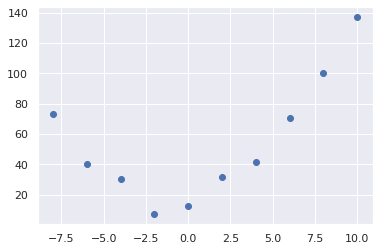

In [4]:
X = np.load("dataset2.npz")["x"]
y = np.load("dataset2.npz")["y"]

display(pd.DataFrame({"X": X, "y": y}))

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
plt.scatter(X, y)
plt.show()

Fit a polynomial model (for the suggested degree) to the data. Comment on the fit (as a function of the model) in terms of the mean square error.

(Hint: Use in-built libraries from Scikit-learn for the exercise.)

### 7.2. Degree 1 (Linear)

3) Using linear regression, find a relation between $Y$ and $X$. Plot the regrssion function(vs $X$) and report the mean square error.

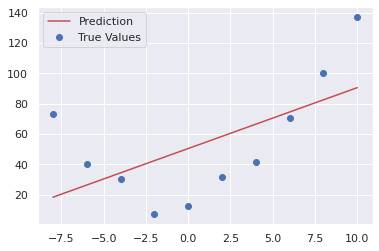

MSE = 977.1734445909718


In [5]:
lin_model = LinearRegression()

lin_model.fit(X, y)

plt.scatter(X, y, label="True Values")
X_r = np.linspace(np.min(X), np.max(X), 1000).reshape(-1, 1)
plt.plot(X_r, lin_model.predict(X_r), c="r", label="Prediction")
plt.legend()
plt.show()

print("MSE =", mean_squared_error(y, lin_model.predict(X)))

### 7.3. Degree 2 (Quadratic)

3) Using polynomial regression of degree 2, Find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

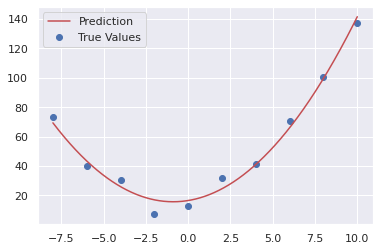

MSE = 24.846331727808156


In [6]:
X_2 = PolynomialFeatures(2).fit_transform(X)

quad_model = LinearRegression()

quad_model.fit(X_2, y)

plt.scatter(X, y, label="True Values")
X_r = np.linspace(np.min(X), np.max(X), 1000).reshape(-1, 1)

X_r_2 = PolynomialFeatures(2).fit_transform(X_r)

plt.plot(X_r, quad_model.predict(X_r_2), c="r", label="Prediction")
plt.legend()
plt.show()

print("MSE =", mean_squared_error(y, quad_model.predict(X_2)))

### 7.4. Degree 3 (Cubic)

4) Using polynomial regression of degree 3, find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error

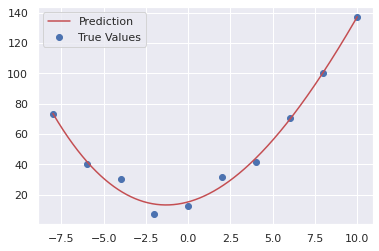

MSE = 16.26492228044507


In [7]:
X_3 = PolynomialFeatures(3).fit_transform(X)

cub_model = LinearRegression()

cub_model.fit(X_3, y)

plt.scatter(X, y, label="True Values")
X_r = np.linspace(np.min(X), np.max(X), 1000).reshape(-1, 1)

X_r_3 = PolynomialFeatures(3).fit_transform(X_r)

plt.plot(X_r, cub_model.predict(X_r_3), c="r", label="Prediction")
plt.legend()
plt.show()

print("MSE =", mean_squared_error(y, cub_model.predict(X_3)))

### 7.5. Degree 9

5) Using polynomial regression of degree 9, find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

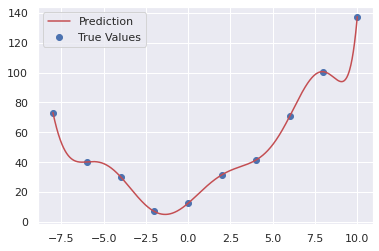

MSE = 8.007064354002041e-14


In [8]:
X_9 = PolynomialFeatures(9).fit_transform(X)

non_model = LinearRegression()

non_model.fit(X_9, y)

plt.scatter(X, y, label="True Values")
X_r = np.linspace(np.min(X), np.max(X), 1000).reshape(-1, 1)

X_r_9 = PolynomialFeatures(9).fit_transform(X_r)

plt.plot(X_r, non_model.predict(X_r_9), c="r", label="Prediction")
plt.legend()
plt.show()

print("MSE =", mean_squared_error(y, non_model.predict(X_9)))

### 7.6. Training Error

6) Plot the mean square error versus the degree of the polynomial fit (for degree = 0,1, ..., 9). Comment on the best model for the data based on MSE of training error

**Note** : Degree 0 means just the intercept

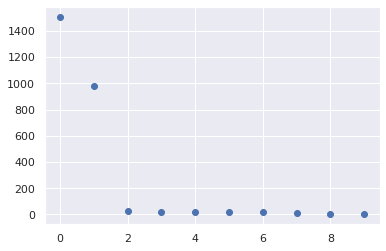

Minimum training MSE occurs in case of degree 9 polynomial. 
Thus it looks to be the best model from the training error point of view.


In [9]:
err = []
model = LinearRegression()
for i in range(0, 10):
    X_n = PolynomialFeatures(i).fit_transform(X)
    model.fit(X_n, y)

    err.append(mean_squared_error(y, model.predict(X_n)))

plt.plot(range(0, 10), err, "bo")
plt.show()

print(
    "Minimum training MSE occurs in case of degree",
    err.index(min(err)),
    "polynomial. \nThus it looks to be the best model from the training error point of view.",
)

### 7.7. Test error

Load **'dataset2_test.npz'**. The data points in the file are from the same distribution as the ones in 'dataset2.npz'.

7) Plot the mean square error by predicting outputs on the test dataset using the trained models of degrees 0,1,...9 obtained with the training data set **dataset2.npz**. Now, comment on the best model for data based on MSE on both training and test datasets.

(Hint: Plot Training error and Testing error in the same plot.) Use Matplotlib for plotting

In [10]:
X_test = np.load("dataset2_test.npz")["x"].reshape(-1, 1)
y_test = np.load("dataset2_test.npz")["y"].reshape(-1, 1)

### 7.8. Best Degree of polynomial

8)Hint : Based on Test error.

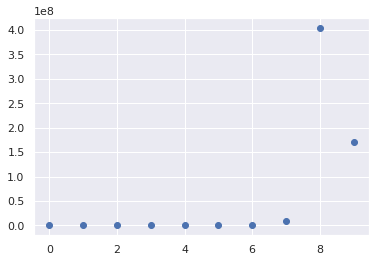

Minimum test MSE occurs in case of degree 2 polynomial. 
Thus it is the best model due to its minimum test MSE.


In [11]:
err = []
model = LinearRegression()
for i in range(0, 10):
    X_n = PolynomialFeatures(i).fit_transform(X)
    model.fit(X_n, y)

    X_test_n = PolynomialFeatures(i).fit_transform(X_test)
    err.append(mean_squared_error(y_test, model.predict(X_test_n)))

plt.plot(range(0, 10), err, "bo")
plt.show()

print(
    "Minimum test MSE occurs in case of degree",
    err.index(min(err)),
    "polynomial. \nThus it is the best model due to its minimum test MSE.",
)

## 8.1. Describe the data
Hint :  Categorical features = ['RAD', 'CHAS', 'ZN'], Non-categorical features = Except categorical all the other features
1. Find Mean, Median for Non-categorical features and Price, Mode only for Categorical feaures
2. Find Quantiles at 25th, 50th, 75th for Non-categorical features and Price
3. Find Maximum and Minimum, Range of the data (max -min) for Non-categorical features and Price
4. Find Distributions (Histogram) for Non-categorical features and Price (Using Seaborn is suggested)

**Note** - Dont use pandas.describe here. You may use inbuilt functions from numpy package. You can store the above descriptive statistics in a dataframe and print that dataframe.

In [12]:
data = pd.read_csv("dataset3.csv")

data_cols = list(data.columns)
X_cols = data_cols[:-1]
cat_cols = list(["RAD", "CHAS", "ZN"])

In [13]:
desc = {
    "Mean": [],
    "Median": [],
    "Mode": [],
    "25%": [],
    "50%": [],
    "75%": [],
    "Std": [],
    "Max": [],
    "Min": [],
    "Range": [],
}
for i in data_cols:
    if i in cat_cols:
        desc["Mean"].append(np.nan)
        desc["Median"].append(np.nan)
        desc["Mode"].append(np.bincount(data[i].values.astype(np.int)).argmax())
        desc["Std"].append(np.nan)
        desc["25%"].append(np.nan)
        desc["50%"].append(np.nan)
        desc["75%"].append(np.nan)
        desc["Max"].append(np.nan)
        desc["Min"].append(np.nan)
        desc["Range"].append(np.nan)
    else:
        desc["Mean"].append(np.mean(data[i]))
        desc["Median"].append(np.median(data[i]))
        desc["Mode"].append(np.nan)
        desc["Std"].append(np.std(data[i]))
        desc["25%"].append(np.quantile(data[i], 0.25))
        desc["50%"].append(np.quantile(data[i], 0.50))
        desc["75%"].append(np.quantile(data[i], 0.75))
        desc["Max"].append(np.max(data[i]))
        desc["Min"].append(np.min(data[i]))
        desc["Range"].append(np.max(data[i]) - np.min(data[i]))
display(pd.DataFrame(desc, index=data_cols).T)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
Mean,3.613524,NaN,11.136779,NaN,0.554695,6.284634,68.574901,3.795043,NaN,408.237154,18.455534,356.674032,12.653063,22.532806
Median,0.256510,NaN,9.690000,NaN,0.538000,6.208500,77.500000,3.207450,NaN,330.000000,19.050000,391.440000,11.360000,21.200000
Mode,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN
25%,0.082045,NaN,5.190000,NaN,0.449000,5.885500,45.025000,2.100175,NaN,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,NaN,9.690000,NaN,0.538000,6.208500,77.500000,3.207450,NaN,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,NaN,18.100000,NaN,0.624000,6.623500,94.075000,5.188425,NaN,666.000000,20.200000,396.225000,16.955000,25.000000
Std,8.593041,NaN,6.853571,NaN,0.115763,0.701923,28.121033,2.103628,NaN,168.370495,2.162805,91.204607,7.134002,9.188012
Max,88.976200,NaN,27.740000,NaN,0.871000,8.780000,100.000000,12.126500,NaN,711.000000,22.000000,396.900000,37.970000,50.000000
Min,0.006320,NaN,0.460000,NaN,0.385000,3.561000,2.900000,1.129600,NaN,187.000000,12.600000,0.320000,1.730000,5.000000
Range,88.969880,NaN,27.280000,NaN,0.486000,5.219000,97.100000,10.996900,NaN,524.000000,9.400000,396.580000,36.240000,45.000000


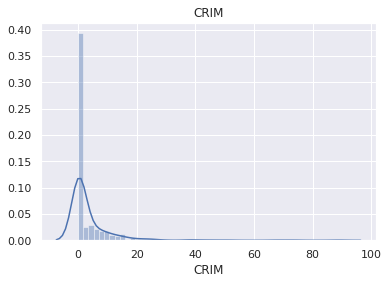

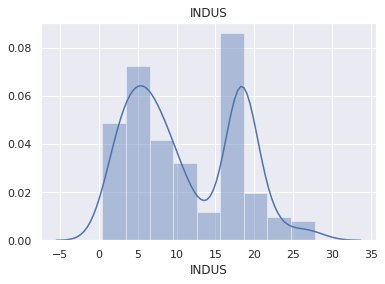

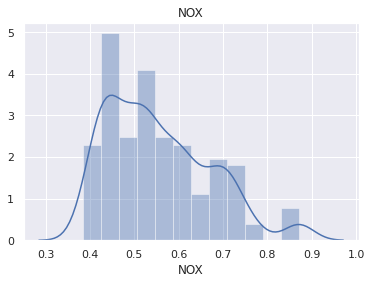

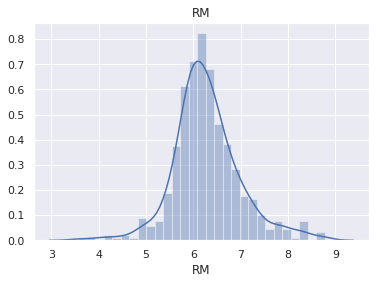

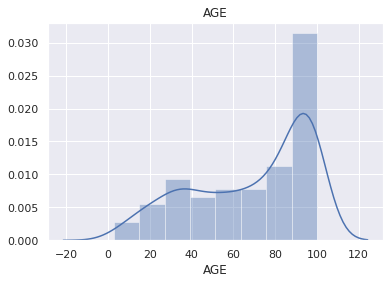

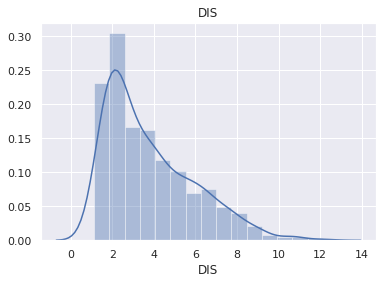

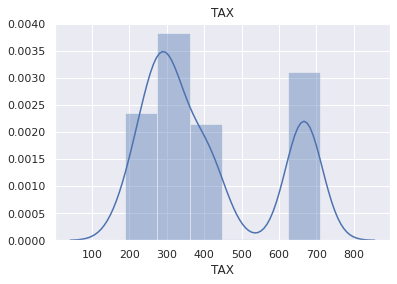

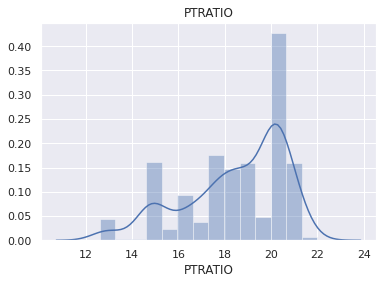

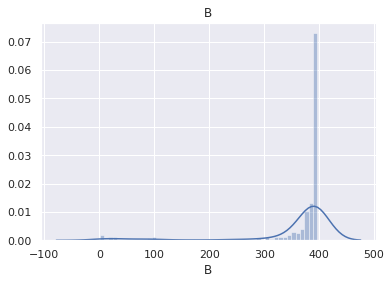

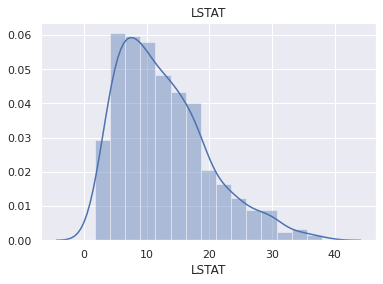

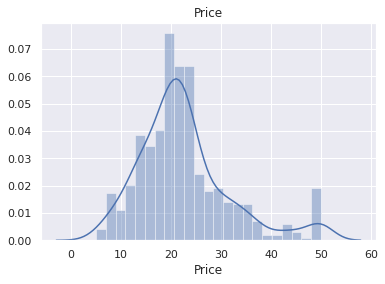

In [14]:
for i in data_cols:
    if i not in cat_cols:
        plt.title(i)
        sns.distplot(data[i])
        plt.show()

## 8.2. Correlation Heatmap for all the features and target
**Hint** : Use Seaborn library to plot, note keep annotate = True

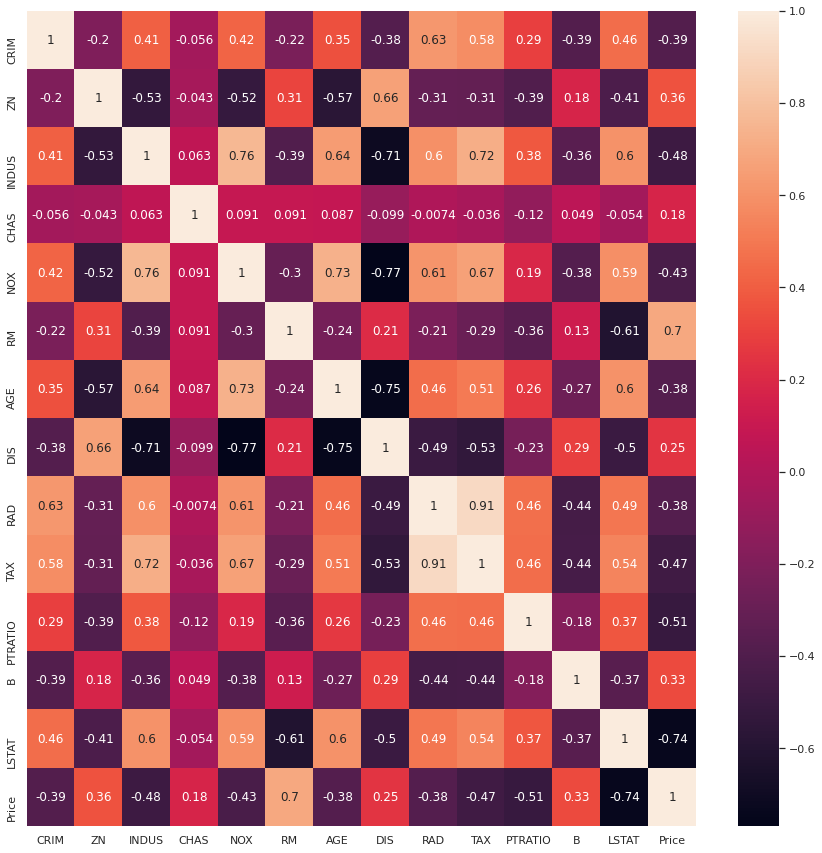

In [15]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True)
plt.show()

## 8.3. Highly Correlated features
Find and print the highly correlated features with respect to "Price". 

In [16]:
corr_price = data.corr()['Price'].reset_index().rename(columns = {"index":"feature","Price":'correlation'})
corr_price = corr_price.iloc[(-corr_price['correlation'].abs()).argsort()][1:].reset_index()
corr_price

,index,feature,correlation
0,12,LSTAT,-0.737663
1,5,RM,0.695360
2,10,PTRATIO,-0.507787
3,2,INDUS,-0.483725
4,9,TAX,-0.468536
5,4,NOX,-0.427321
6,0,CRIM,-0.388305
7,8,RAD,-0.381626
8,6,AGE,-0.376955
9,1,ZN,0.360445


## 8.4. Split the Dataset
**Hint** : Use sklearn train_test_split to split the data into train and test data, keep random state = 2020 and test_size = 0.33

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    data[X_cols], data["Price"], test_size=0.33,random_state=2020
)

## 8.5. Train the model on only train data using linear_regression
Report Train MSE

In [19]:
# Finding mean and standard deviation for standardization

mean = X_train.mean()
std = X_train.std()

In [20]:
for i in X_train.columns:
    if i not in cat_cols:
        X_train[i] = (X_train[i]-mean[i])/std[i]
        X_test[i] = (X_test[i]-mean[i])/std[i]

In [21]:
model = LinearRegression()

model.fit(X_train, y_train)

print("Training Error =", mean_squared_error(y_train, model.predict(X_train)))

Training Error = 22.166423224150183


## 8.6. Predict Outputs for Test Data
Report test MSE

In [22]:
print("Test Error =", mean_squared_error(y_test, model.predict(X_test)))

Test Error = 22.004861555354825


## 8.7. Important Features
Find and print the featuers in order of their importance based on trained regression model.

In [23]:
imp = pd.DataFrame({"feature": X_cols,"importance": model.coef_})
imp = imp.iloc[(-imp['importance'].abs()).argsort()].reset_index()
imp

,index,feature,importance
0,12,LSTAT,-3.635322
1,3,CHAS,3.472599
2,5,RM,3.171699
3,7,DIS,-3.021887
4,10,PTRATIO,-1.961646
5,9,TAX,-1.875264
6,4,NOX,-1.787974
7,0,CRIM,-0.944188
8,11,B,0.791465
9,8,RAD,0.297183


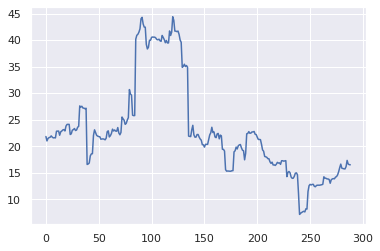

In [25]:
# Residual Variance

rsd = y_train - model.predict(X_train)

var = []

for i in range(len(rsd)-50):
    var.append(np.var(rsd[i:i+50]))
    
plt.plot(var)
plt.show()

# Q&A Section :
1. Comment on assumptions validity discussed in Section 7 with this dataset? Whether we satisfied assumptions or not.
2. Is there any relation between highly important features(from Section 8.7) and highly correlated features with price? Only give descriptive observation.
3. Why usually test error is higher than training error?
4. Will Analytical solution discussed in the Notebook 1 Section 2 be valid on this dataset? Why or Why not?

1. The linear regression assumptions are as follows

    a. Linearity : Since the training error and test error is still a significant value, we can say that the linearity assumption between input and target variable is not fully valid.
    
    b. Homoscedasticity : We see that the variance of the features over different windows do not have the same variance, so the assumption of homoscedasticity is invalid.
    
    c. Independent Observations : Since the rank of the matrix is less than number of observations, in theory the observations are not independant of each other, so our assumption is wrong. Also since our process of observing an new house depends to an degree on what house we observed previously, so we cannot say that the observations are independant and the assumption is invalid.
    
    d. Independant Features : Since the correlation coefficients of the features are non-zero, we can say that the independant features assumption is invalid.
    
    
2. Most of the highly correlated numerical features are also the most important features, so we can say that there direct relation between correlation and importance since highly correlated feauture with target variable will affect the feature prediction more.


3. Since the error minimization is actually done on training error only, and test error is derived from the model and no actual efforts are directly used to reduce it. Although our ultimate aim is to reduce the test error by working with the train data.


4. Analytical solution is valid for linear regression if all the assumptions are valid. Thus in theory it should work for the given dataset too, but it is impractical due to size of the dataset involved and gradient descent works faster.